In [104]:
pip install scikit-fuzzy


In [105]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [106]:
dirt_level = ctrl.Antecedent(np.arange(0, 101, 1), 'Dirt Level')
grease_level = ctrl.Antecedent(np.arange(0, 101, 1), 'Grease Level')

In [107]:
washing_time = ctrl.Consequent(np.arange(0, 120, 1), 'Washing Time')

In [108]:
dirt_level['very_low'] = fuzz.trimf(dirt_level.universe, [0, 0, 25])
dirt_level['low'] = fuzz.trimf(dirt_level.universe, [0, 25, 50])
dirt_level['medium'] = fuzz.trimf(dirt_level.universe, [25, 50, 75])
dirt_level['high'] = fuzz.trimf(dirt_level.universe, [50, 75, 100])
dirt_level['very_high'] = fuzz.trimf(dirt_level.universe, [75, 100, 100])

grease_level['very_low'] = fuzz.trimf(grease_level.universe, [0, 0, 25])
grease_level['low'] = fuzz.trimf(grease_level.universe, [0, 25, 50])
grease_level['high'] = fuzz.trimf(grease_level.universe, [25, 50, 75])
grease_level['very_high'] = fuzz.trimf(grease_level.universe, [50, 75, 100])

In [109]:
washing_time['very_short'] = fuzz.trimf(washing_time.universe, [0, 0, 15])
washing_time['short'] = fuzz.trimf(washing_time.universe, [0, 15, 30])
washing_time['medium'] = fuzz.trimf(washing_time.universe, [15, 30, 45])
washing_time['long'] = fuzz.trimf(washing_time.universe, [30, 45, 60])
washing_time['very_long'] = fuzz.trimf(washing_time.universe, [45, 60, 60])

In [110]:
rule1 = ctrl.Rule(dirt_level['very_low'] & grease_level['very_low'], washing_time['very_short'])
rule2 = ctrl.Rule(dirt_level['very_low'] & grease_level['low'], washing_time['short'])
rule3 = ctrl.Rule(dirt_level['very_low'] & grease_level['high'], washing_time['medium'])
rule4 = ctrl.Rule(dirt_level['low'] & grease_level['very_low'], washing_time['short'])
rule5 = ctrl.Rule(dirt_level['low'] & grease_level['low'], washing_time['short'])
rule6 = ctrl.Rule(dirt_level['low'] & grease_level['high'], washing_time['medium'])
rule7 = ctrl.Rule(dirt_level['medium'] & grease_level['very_low'], washing_time['short'])
rule8 = ctrl.Rule(dirt_level['medium'] & grease_level['low'], washing_time['medium'])
rule9 = ctrl.Rule(dirt_level['medium'] & grease_level['high'], washing_time['long'])
rule10 = ctrl.Rule(dirt_level['high'] & grease_level['very_low'], washing_time['medium'])
rule11 = ctrl.Rule(dirt_level['high'] & grease_level['low'], washing_time['long'])
rule12 = ctrl.Rule(dirt_level['high'] & grease_level['high'], washing_time['very_long'])
rule13 = ctrl.Rule(dirt_level['very_high'] & grease_level['very_low'], washing_time['medium'])
rule14 = ctrl.Rule(dirt_level['very_high'] & grease_level['low'], washing_time['long'])
rule15 = ctrl.Rule(dirt_level['very_high'] & grease_level['high'], washing_time['very_long'])

In [111]:
washing_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
    rule11, rule12, rule13, rule14, rule15
])

In [112]:
washing = ctrl.ControlSystemSimulation(washing_ctrl)

Enter Dirt Level (0-100): 45
Enter Grease Level (0-100): 33
Washing Time: 31.576705115346037


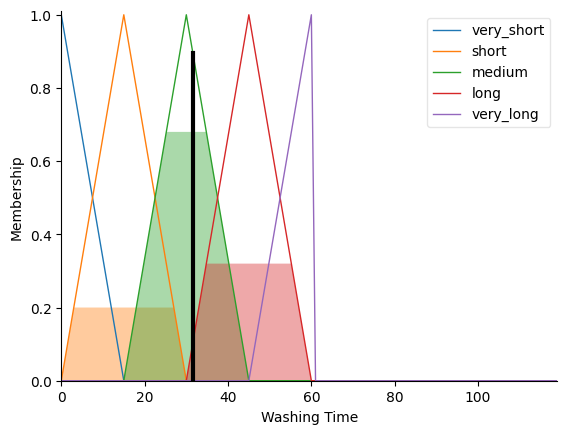

In [114]:
import matplotlib.pyplot as plt
dirt_level_input = float(input("Enter Dirt Level (0-100): "))
grease_level_input = float(input("Enter Grease Level (0-100): "))

washing.input['Dirt Level'] = dirt_level_input
washing.input['Grease Level'] = grease_level_input

washing.compute()

print("Washing Time:", washing.output['Washing Time'])
washing_time.view(sim=washing)

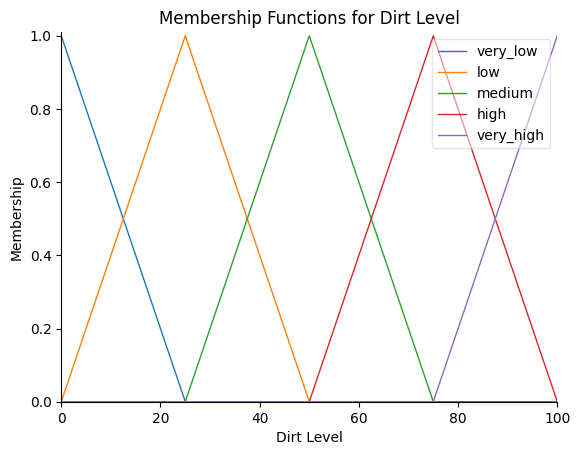

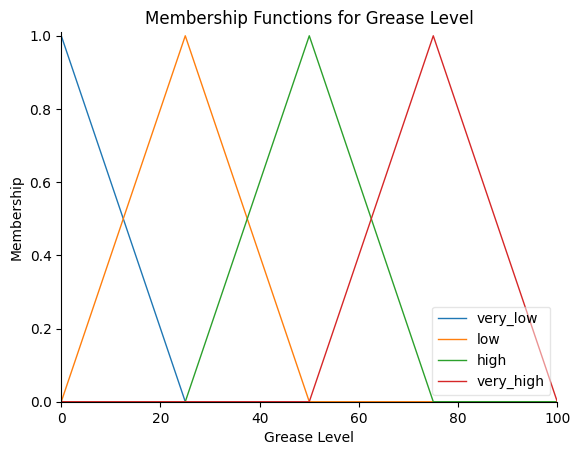

In [115]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

dirt_level = ctrl.Antecedent(np.arange(0, 101, 1), 'Dirt Level')
grease_level = ctrl.Antecedent(np.arange(0, 101, 1), 'Grease Level')

dirt_level['very_low'] = fuzz.trimf(dirt_level.universe, [0, 0, 25])
dirt_level['low'] = fuzz.trimf(dirt_level.universe, [0, 25, 50])
dirt_level['medium'] = fuzz.trimf(dirt_level.universe, [25, 50, 75])
dirt_level['high'] = fuzz.trimf(dirt_level.universe, [50, 75, 100])
dirt_level['very_high'] = fuzz.trimf(dirt_level.universe, [75, 100, 100])

grease_level['very_low'] = fuzz.trimf(grease_level.universe, [0, 0, 25])
grease_level['low'] = fuzz.trimf(grease_level.universe, [0, 25, 50])
grease_level['high'] = fuzz.trimf(grease_level.universe, [25, 50, 75])
grease_level['very_high'] = fuzz.trimf(grease_level.universe, [50, 75, 100])

dirt_level.view()
plt.title('Membership Functions for Dirt Level')
plt.show()

grease_level.view()
plt.title('Membership Functions for Grease Level')
plt.show()
